## Topic Modeling: Latent Dirichlet Allocation vs Non-Negative Matrix Factorization
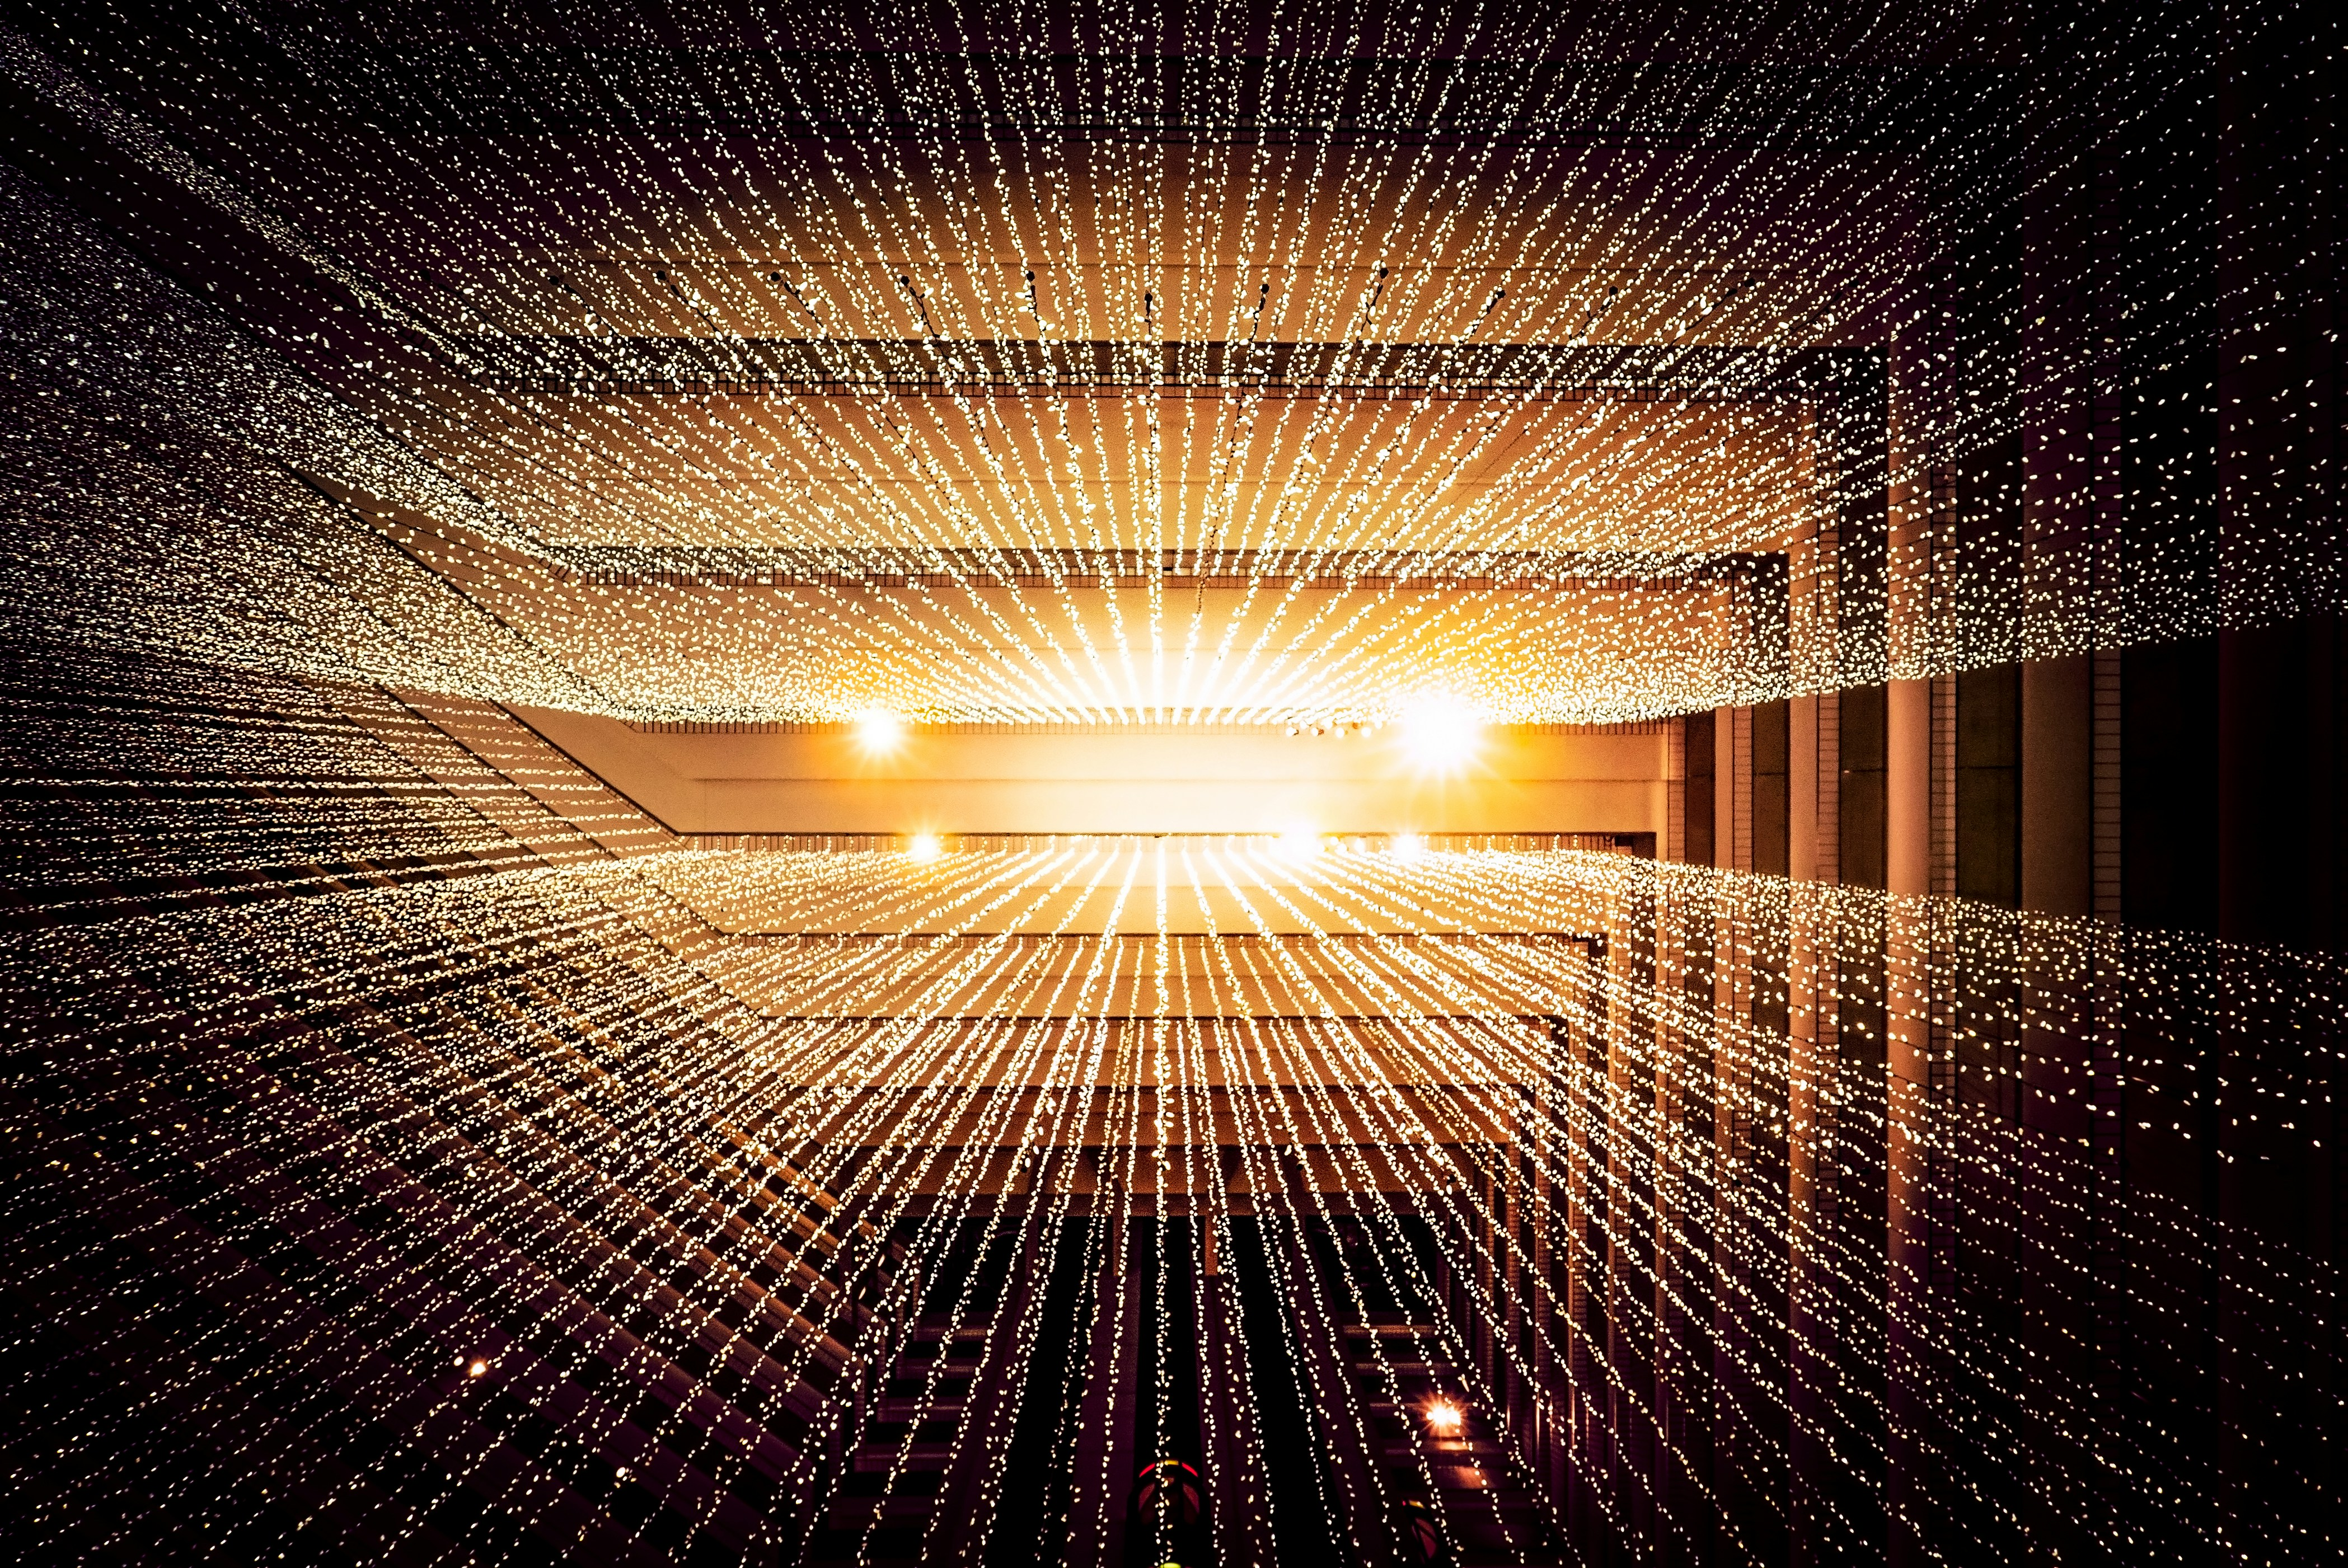
We will use a Kaggle dataset of news articles to experiment with topic modeling using two different unsupervised learning algorithms: Latent Dirichlet Allocation, and Non-Negative Matrix Factorizatation. We will then assign topic lables.

## Data Import, Cleaning, & Preprocessing

In [64]:
import pandas as pd

news_dF = pd.read_csv('../Topic_Modeling/Articles.csv', encoding='latin') #Make sure to specify correct encoding for dataset
news_dF.head()

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3             asian stocks sink euro near nine year   business  
4                 us oil prices slip below 50 a barr  business

In [65]:
## Since we're doing Topic Modeling/Unsupervised, let's get rid of the NewsType category. We want to figure out our own topics.
news_dF = news_dF.drop('NewsType', axis=1)

In [66]:
len(news_dF) #2,692 articles

2692

In [67]:
news_dF.dropna(inplace=True)

In [68]:
len(news_dF)

2692

In [69]:
first_article = news_dF['Article'][0]

In [70]:
first_article.translate({ord(i): None for i in '\r\n\t'})

# Need to do this for every article tho

'KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        '

In [71]:
articles = news_dF['Article']
articles[0]

'KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n'

In [72]:
cleaned_articles = [article.translate({ord(i): None for i in '\r\n'}) for article in articles]

In [73]:
cleaned_articles[0]

'KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        '

In [74]:
news_dF['Articles'] = cleaned_articles

In [75]:
news_dF.head()

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  \
0  sindh govt decides to cut public transport far...   
1                    asia stocks up in new year trad   
2           hong kong stocks open 0.66 percent lower   
3             asian stocks sink euro near nine year    
4                 us oil prices slip below 50 a barr   

                                            Articles  
0  KARACHI: The Sindh government has decided to b...  
1  HONG KONG: Asian markets started 2015 on an up...  
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  
3  HONG KONG: Asian markets tumbled Tuesday follo...  
4  NEW YORK: US oil prices Monday slipped below $...

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

countvec = CountVectorizer(max_df=0.95, min_df=3, stop_words='english')
doc_matrix = countvec.fit_transform(news_dF['Articles'])

In [86]:
doc_matrix.shape # Documents (articles) x Words

(2692, 12230)

In [102]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=7, random_state=16)
lda_model.fit(doc_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=7, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=16, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [103]:
from random import randint
random_word_id = randint(0, 12230)
random_word = countvec.get_feature_names()[random_word_id]
print(random_word)

benfica


In [104]:
len(lda_model.components_)

7

14 Topics in the latent dirichlet, just like we asked for.

In [105]:
for i , topic in enumerate(lda_model.components_):
    print(f'TOP 15 WORDS FOR TOPIC {i+1}:')
    print([countvec.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print()

TOP 15 WORDS FOR TOPIC 1:
['month', 'strong', 'opec', 'million', 'markets', 'global', 'dollar', 'week', 'market', 'crude', 'year', 'prices', 'said', 'oil', 'percent']

TOP 15 WORDS FOR TOPIC 2:
['just', 'match', 'game', 'win', 'team', 'old', 'final', 'strong', 'second', 'time', 'world', 'year', 'said', 'test', 'england']

TOP 15 WORDS FOR TOPIC 3:
['told', 'years', 'market', '000', 'world', 'trade', 'br', 'company', 'new', 'china', 'billion', 'year', 'strong', 'million', 'said']

TOP 15 WORDS FOR TOPIC 4:
['ali', 'islamabad', 'india', 'afridi', 'match', 'strong', 'ahmed', 'captain', 'said', 'cricket', 'team', 'amir', 'khan', 'mohammad', 'pakistan']

TOP 15 WORDS FOR TOPIC 5:
['bank', 'sector', 'percent', 'rs', 'power', 'islamabad', 'economic', 'tax', 'country', 'year', 'minister', 'government', 'billion', 'pakistan', 'said']

TOP 15 WORDS FOR TOPIC 6:
['ball', 'england', 'new', 'australia', 'innings', 'india', 'captain', 'balls', 'overs', 'lanka', 'match', 'sri', 'wicket', 'wickets', '

In [106]:
topics = lda_model.transform(doc_matrix)
topics.shape

(2692, 7)

In [107]:
## 2,692 articles x 7 topics
news_dF['Topic'] = topics.argmax(axis=1)
news_dF.head()

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  \
0  sindh govt decides to cut public transport far...   
1                    asia stocks up in new year trad   
2           hong kong stocks open 0.66 percent lower   
3             asian stocks sink euro near nine year    
4                 us oil prices slip below 50 a barr   

                                            Articles  Topic  
0  KARACHI: The Sindh government has decided to b...      2  
1  HONG KONG: Asian markets started 2015 on an up...      0  
2  HONG KONG:  Hong Kong shares opened 0.66 perce...      0  
3  HONG KONG: Asian markets tumbled Tuesday follo...      0  
4  NEW YORK: US oil prices Monday slipped below $...      0

In [108]:
topic_labels = {0:'Oil Markets', 1:'Sports', 2:'Business', 3:'Cricket', 4:'Global Economy', 5:'Soccer', 6:'Cricket'}

news_dF['Topic'] = news_dF['Topic'].map(topic_labels)

news_dF.head()

Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  \
0  sindh govt decides to cut public transport far...   
1                    asia stocks up in new year trad   
2           hong kong stocks open 0.66 percent lower   
3             asian stocks sink euro near nine year    
4                 us oil prices slip below 50 a barr   

                                            Articles        Topic  
0  KARACHI: The Sindh government has decided to b...     Business  
1  HONG KONG: Asian markets started 2015 on an up...  Oil Markets  
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  Oil Markets  
3  HONG KONG: Asian markets tumbled Tuesday follo...  Oil Markets  
4  NEW YORK: US oil prices Monday slipped below $...  Oil Markets

We can also do this with Non-Negative Matrix Factorization.